In [4]:
!pip3 install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.0/30.0 MB 15.0 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.1.2 -> 22.3
[notice] To update, run: pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import cv2

In [2]:
# function to plot n images using subplots
def plot_image(images, captions=None, cmap=None ):
    f, axes = plt.subplots(1, len(images), sharey=True)
    f.set_figwidth(15)
    for ax,image,caption in zip(axes, images, captions):
        ax.imshow(image, cmap)
        ax.set_title(caption)

## Read Video Frame by Frame

In [3]:
vidcap = cv2.VideoCapture('../datasets/yt_video1.mp4')
success,image = vidcap.read()
count = 0

while success:
    cv2.imwrite(f"./frames/frame%d.jpg" % count, image)     # save frame as JPEG file      
    success,image = vidcap.read()
    print('Read a new frame: ', success)
    count += 1
    

    
    
    if count == 2: ####
        break

Read a new frame:  True
Read a new frame:  True


## Preprocess 2 consecutive Frames

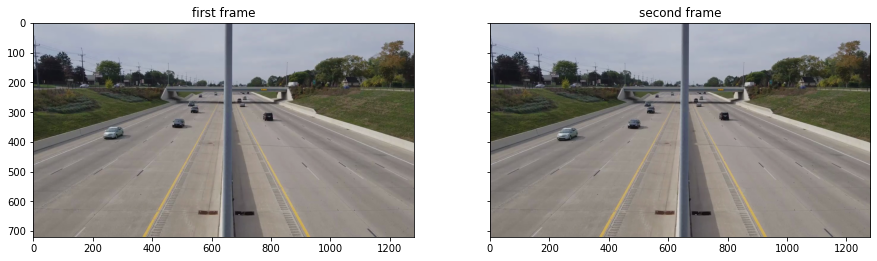

In [4]:
img1 = mpimg.imread('frames/frame0.jpg')
img2 = mpimg.imread('frames/frame1.jpg')
plot_image([img1, img2], cmap='gray', captions=["first frame", "second frame"])

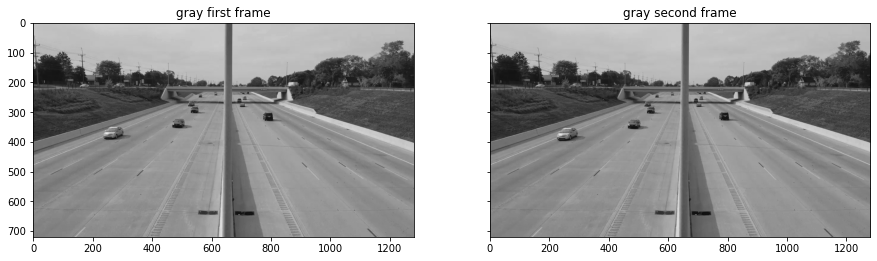

In [5]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

plot_image([img1, img2], cmap='gray', captions=["gray first frame", "gray second frame"])

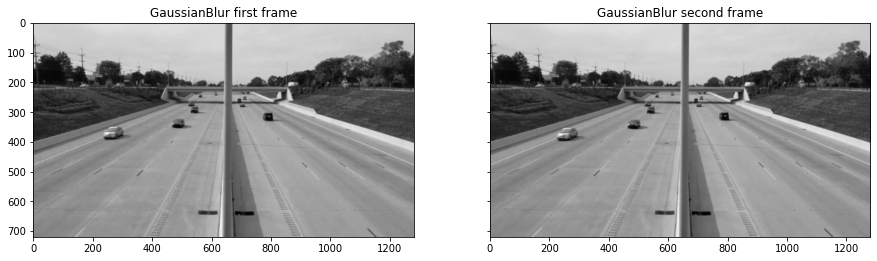

In [6]:
img1 = cv2.GaussianBlur(img1,(5,5),0)
img2 = cv2.GaussianBlur(img2,(5,5),0)

plot_image([img1, img2], cmap='gray', captions=["GaussianBlur first frame", "GaussianBlur second frame"])

# convert to birdeye

In [32]:
img1.shape

(720, 1280)

In [36]:
img1_flip = cv2.flip(img1, 0)

In [37]:
img1_flip.shape

(720, 1280)

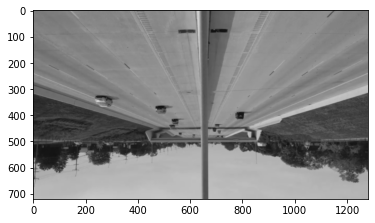

In [38]:
plt.imshow(cv2.cvtColor(img1_flip, cv2.COLOR_BGR2RGB)) # Show results
plt.show()

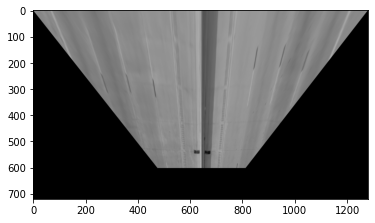

In [40]:
IMAGE_H = 720
IMAGE_W = 1280

src = np.float32([[0, IMAGE_H], [1207, IMAGE_H], [0, 0], [IMAGE_W, 0]])
dst = np.float32([[569, IMAGE_H], [711, IMAGE_H], [0, 0], [IMAGE_W, 0]])
M = cv2.getPerspectiveTransform(src, dst) # The transformation matrix
Minv = cv2.getPerspectiveTransform(dst, src) # Inverse transformation

img = img2 # Read the test img
img = img[450:(450+IMAGE_H), 0:IMAGE_W] # Apply np slicing for ROI crop

warped_img = cv2.warpPerspective(img, M, (IMAGE_W, IMAGE_H)) # Image warping

plt.imshow(cv2.cvtColor(warped_img, cv2.COLOR_BGR2RGB)) # Show results
plt.show()

## Detect possible Speed of a Porsche - Easy